<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Machine%20learning-linear%20regression%20algorithm%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This case study has objective to analyst the corelation between "lead time" and "reservation month". How strong the corelation is. Is there any specific month that has certain lead time?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']

In [ ]:
dfbh=pd.read_csv('hotel_booking.csv')
dfbh.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
dfbh.shape

(69635, 36)

1. DATA CLEANING

We have to check dataframe for finding the missing value and duplicate data.

In [ ]:
dfbh.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             486
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10487
company                           65856


In [ ]:
dfbh.isna().sum().to_frame

<bound method Series.to_frame of hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             486
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10487
company

In [ ]:
dfbh.duplicated().any()

False

We found missing values in "children","cauntry", "agent", "company","name","email","phone_number" and "credit card" columns but no dupilcates data. We will replace missing values/NAN with modus in each that coluomns.

In [ ]:
dfbh['country'].value_counts()

PRT    33037
GBR     8197
ESP     5743
FRA     3708
IRL     2515
       ...  
BHS        1
TGO        1
DJI        1
STP        1
UMI        1
Name: country, Length: 149, dtype: int64

In [ ]:
dfbh['country'].fillna('PRT', inplace=True)

In [ ]:
dfbh['country'].isna().sum()

0

In [ ]:
dfbh['agent'].value_counts()

240.0    13906
9.0      12195
1.0       3840
250.0     2869
241.0     1721
         ...  
497.0        1
54.0         1
210.0        1
129.0        1
114.0        1
Name: agent, Length: 264, dtype: int64

In [ ]:
dfbh['agent'].fillna(9.0, inplace=True)

In [ ]:
dfbh['agent'].isna().sum()

0

In [ ]:
dfbh['company'].value_counts()

223.0    784
281.0    138
154.0    133
67.0     107
405.0    101
        ... 
413.0      1
408.0      1
104.0      1
6.0        1
212.0      1
Name: company, Length: 275, dtype: int64

In [ ]:
dfbh['company'].fillna(223.0, inplace=True)

In [ ]:
dfbh['company'].isna().sum()

0

Missing value in coluomns "name","email","phone_number" and "credit card" , will be droped due to little number.

> Pemblokiran indentasi



In [ ]:
dfbh.dropna(subset=['children'], axis=0, inplace=True)

In [ ]:
dfbh.dropna(subset=['name'], axis=0, inplace=True)

In [ ]:
dfbh.dropna(subset=['email'], axis=0, inplace=True)

In [ ]:
dfbh.dropna(subset=['phone-number'], axis=0, inplace=True)

In [ ]:
dfbh.dropna(subset=['credit_card'], axis=0, inplace=True)

Dataframe already clean, no missing value/NAN. Actually "country","agent", "company" and "credit_card" there are not corelation with my objective but I just want to make no mising value in dataframe.

In [ ]:
dfbh.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


In [ ]:
dfbh.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
dfbh.shape

(69630, 36)

In [ ]:
dfbh.reset_index(drop=True, inplace=True)

Now we have to check the type of data in this dataframe

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69630 entries, 0 to 69629
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           69630 non-null  object 
 1   is_canceled                     69630 non-null  int64  
 2   lead_time                       69630 non-null  int64  
 3   arrival_date_year               69630 non-null  int64  
 4   arrival_date_month              69630 non-null  object 
 5   arrival_date_week_number        69630 non-null  int64  
 6   arrival_date_day_of_month       69630 non-null  int64  
 7   stays_in_weekend_nights         69630 non-null  int64  
 8   stays_in_week_nights            69630 non-null  int64  
 9   adults                          69630 non-null  int64  
 10  children                        69630 non-null  float64
 11  babies                          69630 non-null  int64  
 12  meal                            

In [ ]:
dfbh.shape

(69630, 36)

2. DATA DISTRIBUTION

We do observation to make sure any outliers or not. We use library Matplotlib.plot and seaborn to check.

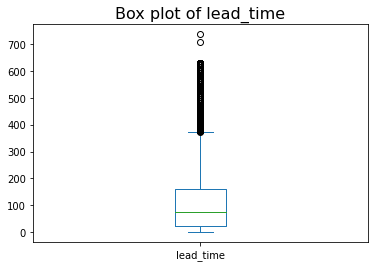

In [ ]:
dfbh['lead_time'].plot(kind='box')
plt.title('Box plot of lead_time', size=16)
plt.show()

Text(0.5, 1.0, 'Box plot of lead_time')

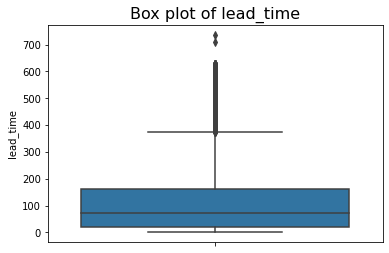

In [ ]:
sns.boxplot(data=dfbh, y='lead_time').set_title("Box plot of lead_time", size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


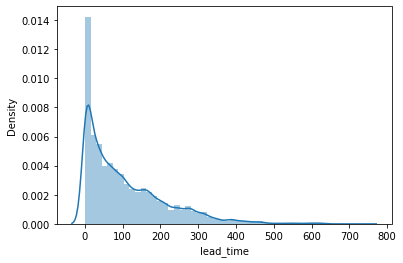

In [ ]:
sns.distplot(dfbh['lead_time'])

In [ ]:
Q1=dfbh['lead_time'].quantile(0.25)
Q3=dfbh['lead_time'].quantile(0.75)
IQR=Q3-Q1
print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR = ',IQR)

Q1 = 21.0
Q3 = 162.0
IQR =  141.0


In [ ]:
max_IQR=Q3+0.5*Q3
min_IQR=Q1-0.5*Q1

In [ ]:
dfbh_new = dfbh[(dfbh["lead_time"] < max_IQR) & (dfbh["lead_time"] > min_IQR)]

In [ ]:
dfbh_new.shape

(48572, 36)

In [ ]:
dfbh_new.reset_index(drop=True, inplace=True)

In [ ]:
dfbh_new.shape

(48572, 36)

In [ ]:
dfbh_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


Text(0.5, 1.0, 'Box plot of lead_time')

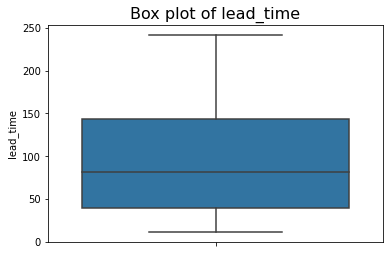

In [ ]:
sns.boxplot(y=dfbh_new['lead_time']).set_title("Box plot of lead_time", size=16)

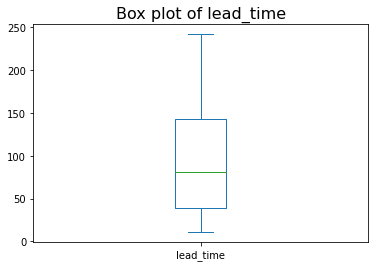

In [ ]:
dfbh_new['lead_time'].plot(kind='box')
plt.title('Box plot of lead_time', size=16)
plt.show()

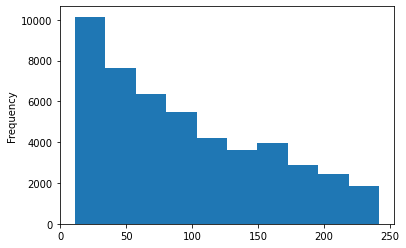

In [ ]:
dfbh_new['lead_time'].plot(kind='hist')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


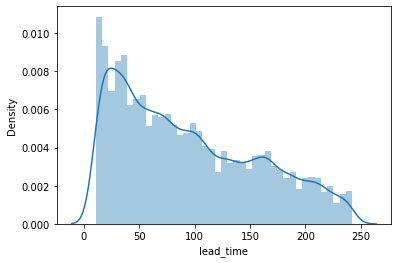

In [ ]:
sns.distplot(dfbh_new['lead_time'])

In [ ]:
dfbh_new['arrival_date_month'].str.replace('february','2')

In [ ]:
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('February','2')

In [ ]:
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('March','3')

In [ ]:
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('April','4')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('May','5')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('June','6')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('July','7')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('August','8')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('September','9')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('October','10')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('November','11')
dfbh_new['arrival_date_month']=dfbh_new['arrival_date_month'].str.replace('December','12')

In [ ]:
dfbh_new['arrival_date_month'].value_counts()

8     5768
4     5510
5     5334
7     4805
10    4580
9     4444
3     4119
6     3356
2     3091
12    2786
11    2635
1     2144
Name: arrival_date_month, dtype: int64

In [ ]:
dfbh_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48572 entries, 0 to 48571
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           48572 non-null  object 
 1   is_canceled                     48572 non-null  int64  
 2   lead_time                       48572 non-null  int64  
 3   arrival_date_year               48572 non-null  int64  
 4   arrival_date_month              48572 non-null  object 
 5   arrival_date_week_number        48572 non-null  int64  
 6   arrival_date_day_of_month       48572 non-null  int64  
 7   stays_in_weekend_nights         48572 non-null  int64  
 8   stays_in_week_nights            48572 non-null  int64  
 9   adults                          48572 non-null  int64  
 10  children                        48572 non-null  float64
 11  babies                          48572 non-null  int64  
 12  meal                            

In [ ]:
dfbh_new=dfbh_new.astype({'arrival_date_month':'int'})

In [ ]:
dfbh_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48572 entries, 0 to 48571
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           48572 non-null  object 
 1   is_canceled                     48572 non-null  int64  
 2   lead_time                       48572 non-null  int64  
 3   arrival_date_year               48572 non-null  int64  
 4   arrival_date_month              48572 non-null  int64  
 5   arrival_date_week_number        48572 non-null  int64  
 6   arrival_date_day_of_month       48572 non-null  int64  
 7   stays_in_weekend_nights         48572 non-null  int64  
 8   stays_in_week_nights            48572 non-null  int64  
 9   adults                          48572 non-null  int64  
 10  children                        48572 non-null  float64
 11  babies                          48572 non-null  int64  
 12  meal                            

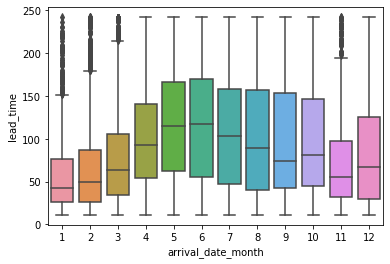

In [ ]:
sns.boxplot(x="arrival_date_month", y='lead_time',data=dfbh_new)

In [ ]:
dfbh['reservation_status_date']=pd.to_datetime(dfbh['reservation_status_date'])

In [ ]:
dfbh['reservation_status_date'].head(20)

0    2015-07-01
1    2015-07-01
2    2015-07-02
3    2015-07-02
4    2015-07-03
5    2015-07-03
6    2015-07-03
7    2015-07-03
8    2015-05-06
9    2015-04-22
10   2015-06-23
11   2015-07-05
12   2015-07-05
13   2015-07-05
14   2015-07-05
15   2015-07-05
16   2015-07-05
17   2015-07-02
18   2015-07-02
19   2015-07-05
Name: reservation_status_date, dtype: datetime64[ns]

In [ ]:
dfbh['resrv_year']=dfbh['reservation_status_date'].dt.year
dfbh['resrv_month']=dfbh['reservation_status_date'].dt.month
dfbh['resrv_day']=dfbh['reservation_status_date'].dt.day
dfbh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh.drop(columns=['reservation_status_date'], axis=1, inplace=True)

In [ ]:
dfbh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh['resrv_year'].isna().sum()

0

In [ ]:
dfbh['resrv_month'].isna().sum()

0

In [ ]:
dfbh['resrv_day'].isna().sum()

0

In [ ]:
dfbh['resrv_year'].value_counts()

2016    57797
2017    36483
2015    24929
2014      181
Name: resrv_year, dtype: int64

In [ ]:
dfbh['resrv_month'].value_counts()

7     12106
8     11249
10    11143
1     10681
5     10304
3     10230
4      9999
2      9498
9      9403
6      9278
11     8099
12     7400
Name: resrv_month, dtype: int64

In [ ]:
dfbh['resrv_day'].value_counts()

15    1300
29    1273
12    1271
17    1260
19    1256
21    1215
26    1208
20    1203
18    1194
9     1174
6     1164
2     1158
3     1147
30    1136
4     1127
16    1117
11    1107
28    1105
10    1102
22    1080
8     1077
27    1075
5     1063
23    1050
25    1049
13    1047
24    1035
14    1033
1      988
7      934
31     628
Name: resrv_day, dtype: int64

In [ ]:
dfbh['resrv_year'].fillna(2016.0,inplace=True)

In [ ]:
dfbh['resrv_month'].fillna(1.0,inplace=True)

In [ ]:
dfbh['resrv_day'].fillna(21.0, inplace=True)

In [ ]:
dfbh['resrv_year'].isna().sum()

0

In [ ]:
dfbh['resrv_day'].isna().sum()

0

In [ ]:
dfbh['resrv_year']=dfbh['resrv_year'].astype('int64')

In [ ]:
dfbh['resrv_month']=dfbh['resrv_month'].astype('int64')

In [ ]:
dfbh['resrv_day']=dfbh['resrv_day'].astype('int64')

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,2015,7,3
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,Check-Out,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,2015,7,3
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,1,Check-Out,William Velez,Velez_William@mail.com,286-669-4333,************8729,2015,7,3
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,2015,5,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,2015,4,22


In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('January','1')

In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('February','2')

In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('March','3')

In [ ]:
dfbh['arrival_date_month'].head(20)

0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
18    7
19    7
Name: arrival_date_month, dtype: object

In [ ]:
dfbh[~dfbh['arrival_date_month'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh['arrival_date_month'].value_counts()

8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64

In [ ]:
dfbh[~dfbh['arrival_date_month'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh=dfbh.astype({'arrival_date_month':'int'})

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,resrv_year,resrv_month,resrv_day
count,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,...,34576.000000,27074.000000,2833.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000
mean,0.321610,89.959654,2015.982097,6.655368,27.699069,15.749075,1.163177,3.067301,1.857531,0.123496,...,0.270419,215.866219,237.584539,0.574387,89.576216,0.130235,0.578407,2015.947594,6.349983,15.916532
std,0.467101,96.738557,0.680222,3.359076,14.766051,8.854075,1.146826,2.460766,0.732989,0.438912,...,0.695977,85.316193,124.267506,7.766339,58.639576,0.343204,0.790168,0.669273,3.541616,8.758703
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,10.000000,2016.000000,4.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,240.000000,154.000000,0.000000,48.000000,0.000000,0.000000,2015.000000,3.000000,8.000000
50%,0.000000,53.000000,2016.000000,7.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,...,0.000000,240.000000,223.000000,0.000000,70.870000,0.000000,0.000000,2016.000000,7.000000,16.000000
75%,1.000000,148.000000,2016.000000,9.000000,40.000000,24.000000,2.000000,5.000000,2.000000,0.000000,...,0.000000,242.000000,329.000000,0.000000,115.200000,0.000000,1.000000,2016.000000,10.000000,23.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,17.000000,531.000000,543.000000,185.000000,508.000000,8.000000,5.000000,2017.000000,12.000000,31.000000


In [ ]:
dfbh['phone-number']=dfbh['phone-number'].str.replace('-','')

In [ ]:
dfbh['phone-number'].head(20)

0     6697921661
1     8586376955
2     6528852745
3     3646568427
4     7132265883
5     1902716743
6     4203325209
7     2866694333
8     3417265787
9     3166486176
10    8338877898
11    8043834080
12    2110712173
13    4350758409
14    7907467471
15    6493845387
16    3314308824
17    5733069938
18    4664242102
19    8966421049
Name: phone-number, dtype: object

In [ ]:
dfbh['phone-number'].value_counts()

6697921661    1
9513266252    1
4462288858    1
3252247726    1
4505664040    1
             ..
1953217724    1
7839427089    1
4259448128    1
8959519632    1
4228046403    1
Name: phone-number, Length: 119390, dtype: int64

In [ ]:
dfbh['phone-number'].isna().sum()

0

In [ ]:
#dfbh['phone-number'].fillna('6697921661', inplace=True)

In [ ]:
dfbh[~dfbh['phone-number'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,4030925582,************8647,2017,9,6
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,2387630612,************4333,2017,9,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,3955184100,************1821,2017,9,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,5315281017,************7860,2017,9,7


In [ ]:
dfbh=dfbh.astype({'phone-number':'int'})

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3


In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [ ]:
dfbh['agent'].isna().sum()

16340

In [ ]:
dfbh['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
dfbh['children'].isna().sum()

4

In [ ]:
dfbh['country'].isna().sum()

488

In [ ]:
dfbh['company'].isna().sum()

112593

In [ ]:
dfbh['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
dfbh['agent'].fillna(9.0, inplace=True)

In [ ]:
dfbh['agent'].isna().sum()

0

In [ ]:
dfbh['children'].replace(np.nan,dfbh['children'].mean(), inplace=True)

In [ ]:
dfbh['children'].isna().sum()

0

In [ ]:
dfbh['country'].head(20)

0     PRT
1     PRT
2     GBR
3     GBR
4     GBR
5     GBR
6     PRT
7     PRT
8     PRT
9     PRT
10    PRT
11    PRT
12    USA
13    ESP
14    PRT
15    IRL
16    PRT
17    IRL
18    FRA
19    GBR
Name: country, dtype: object

In [ ]:
dfbh['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
dfbh['country'].fillna('PRT', inplace=True)

In [ ]:
dfbh['country'].isna().sum()

0

In [ ]:
dfbh.drop(columns=['credit_card'],axis=1, inplace=True)

In [ ]:
dfbh.drop('credit_card', axis=1, inplace=True)

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,2015,7,3
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.00,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,1902716743,2015,7,3
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,107.00,0,0,Check-Out,Dylan Rangel,Rangel.Dylan@comcast.net,4203325209,2015,7,3
7,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,103.00,0,1,Check-Out,William Velez,Velez_William@mail.com,2866694333,2015,7,3
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,82.00,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,3417265787,2015,5,6
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,105.50,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,3166486176,2015,4,22


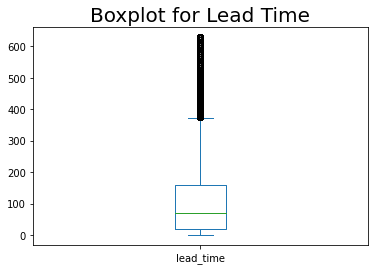

In [ ]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for Lead Time', size=20)
plt.show()

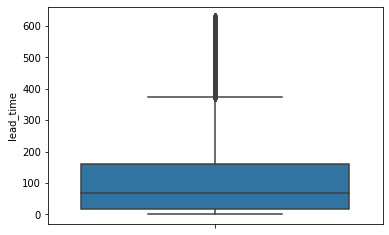

In [ ]:
sns.boxplot(y=dfbh['lead_time'])

In [ ]:
print('min_IQR=',min_IQR)

min_IQR= -195.0


In [ ]:
print('max_IQR=',max_IQR)

max_IQR= 373.0


In [ ]:
if (nilai_min < min_IQR):                        
  print('Low outlier is found <', min_IQR)
  print('Low Outlier Index :', list(dfbh[dfbh['lead_time'] < min_IQR].index))

In [ ]:
if (nilai_max > max_IQR):
    print('High outlier is found >', max_IQR)
    print('High outlier Index : ', list(dfbh[dfbh['lead_time'] > max_IQR].index))

High outlier is found > 373.0
High outlier Index :  [7847, 7848, 7849, 7850, 7866, 7898, 7904, 8045, 8122, 8124, 8127, 8200, 8220, 8221, 8223, 8224, 8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8283, 8284, 8285, 8286, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8321, 8322, 8323, 8324, 8328, 8329, 8330, 8331, 8332, 8395, 8397, 8399, 8400, 8419, 8421, 8422, 8423, 8425, 8428, 8505, 8506, 8546, 8547, 8549, 8550, 8551, 8552, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8603, 8613, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8637, 8638, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8800, 8825, 8857, 8888, 8895, 8904, 8905, 8906, 8907, 8910, 8911, 8915,

In [ ]:
dfbh.drop([5704, 5705, 5707, 5708, 5712, 5713, 5714, 5715, 5716, 5717, 6829, 6920, 7318, 7790, 7811, 7846],axis=0, inplace=True)

In [ ]:
dfbh.drop([1,890,4182],axis=0, inplace=True)

In [ ]:
dfbh.drop([225,1516, 1672],axis=0, inplace=True)

In [ ]:
dfbh.reset_index(drop=True, inplace=True)

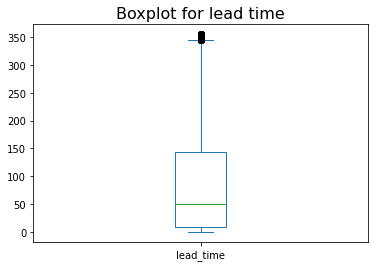

In [ ]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for lead time', size=16)
plt.show()

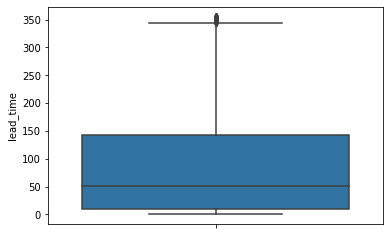

In [ ]:
sns.boxplot(y=dfbh['lead_time'])